In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2024-08-10 22:29:46.926407: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-10 22:29:46.926507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-10 22:29:47.051831: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv('/kaggle/input/it-service-ticket-classification-dataset/all_tickets_processed_improved_v3.csv')

In [3]:
label_encoder = LabelEncoder()
df['Topic_group_encoded'] = label_encoder.fit_transform(df['Topic_group'])
topic_groups = label_encoder.classes_

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Document'], df['Topic_group_encoded'], test_size=0.2, random_state=42)

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=100)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=100)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(topic_groups), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
  99/1196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2643 - loss: 1.9505

I0000 00:00:1723329004.620764     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1196/1196 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4679 - loss: 1.4900 - val_accuracy: 0.8168 - val_loss: 0.5922
Epoch 2/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8313 - loss: 0.5215 - val_accuracy: 0.8342 - val_loss: 0.4972
Epoch 3/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8664 - loss: 0.4019 - val_accuracy: 0.8521 - val_loss: 0.4516
Epoch 4/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8892 - loss: 0.3292 - val_accuracy: 0.8426 - val_loss: 0.4613
Epoch 5/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8934 - loss: 0.3093 - val_accuracy: 0.8404 - val_loss: 0.4638
Epoch 6/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9084 - loss: 0.2725 - val_accuracy: 0.8537 - val_loss: 0.4417
Epoch 7/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9128 - loss: 0.2494 - val_accuracy: 0.8514 - val_loss: 0.4487
Epoch 8/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9193 - loss: 0.2321 - val_accurac

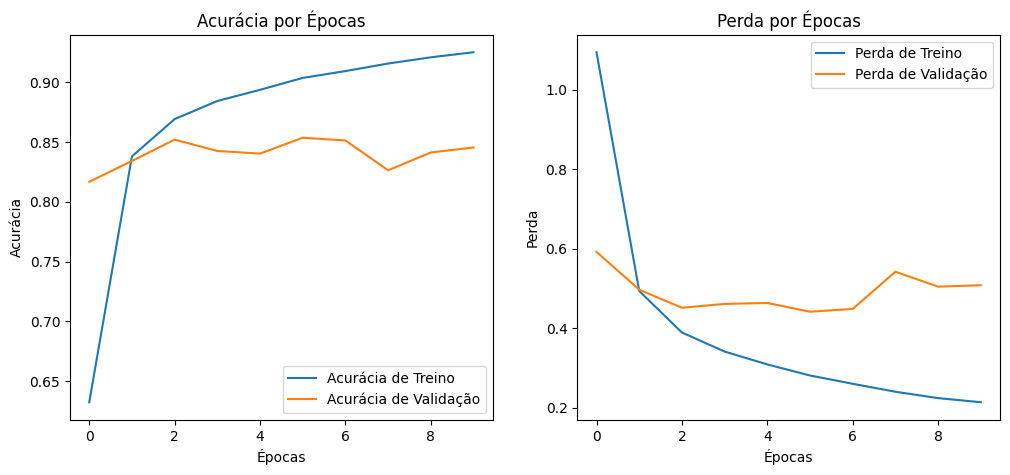

In [6]:
# Acurácia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.show()

In [7]:
loss, accuracy = model.evaluate(test_padded, test_labels)
print("Accuracy: ", accuracy)

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8529 - loss: 0.4975
Accuracy:  0.8455267548561096


In [8]:
predictions = model.predict(test_padded)
predicted_labels = np.argmax(predictions, axis=1)

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [9]:
cm = confusion_matrix(test_labels, predicted_labels)

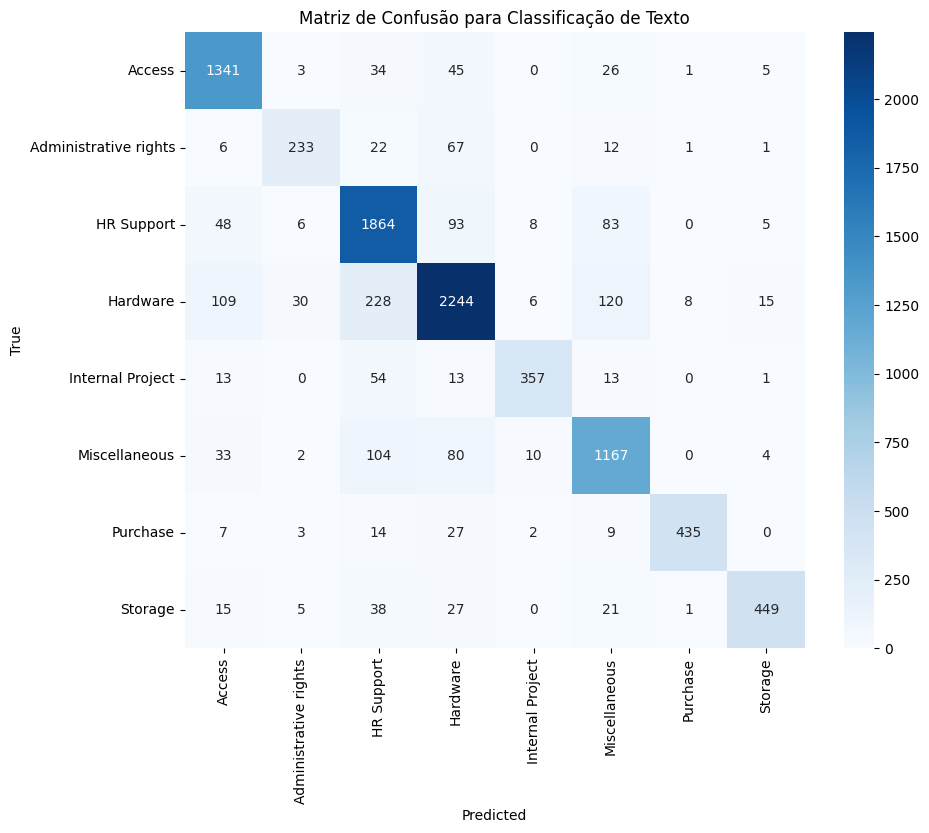

In [10]:
topic_groups_names = label_encoder.inverse_transform(np.unique(test_labels))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=topic_groups_names, yticklabels=topic_groups_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão para Classificação de Texto')
plt.show()

In [16]:
random_index = np.random.randint(0, len(test_texts))
sample_text = test_texts.iloc[random_index]
sample_label = test_labels.iloc[random_index]

sample_sequence = tokenizer.texts_to_sequences([sample_text])
sample_padded = tf.keras.preprocessing.sequence.pad_sequences(sample_sequence, maxlen=100)

prediction = model.predict(sample_padded)
predicted_label = np.argmax(prediction)

print("Texto original: ", sample_text)
print("Label esperado: ", label_encoder.inverse_transform([sample_label])[0])
print("Label obtido: ", label_encoder.inverse_transform([predicted_label])[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Texto original:  outlook reminders not being sent sent tuesday march reminders hi guys please log ticket investigate below behavior most meetings have reminders set usually up when there minutes left when for meetings arrives happens separate window close by hitting button dismiss reminders however more often than second reminder one minutes left never pops up can lead being late for meetings or even them altogether recently switched cached mode maybe something with thank you manager
Label esperado:  Administrative rights
Label obtido:  Administrative rights
